In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
df=pd.read_csv(r"../Dataset/Battery_RUL.csv")

In [6]:
df

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0              1.0             2595.30             1151.488500   
1              2.0             7408.64             1172.512500   
2              3.0             7393.76             1112.992000   
3              4.0             7385.50             1080.320667   
4              6.0            65022.75            29813.487000   
...            ...                 ...                     ...   
15059       1108.0              770.44              179.523810   
15060       1109.0              771.12              179.523810   
15061       1110.0              769.12              179.357143   
15062       1111.0              773.88              162.374667   
15063       1112.0           677537.27           142740.640000   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                          3.670                    3.211           5460.001   
1                          4.246                    3.220           5508.992   
2                          4.249                    3.224           5508.993   
3                          4.250                    3.225           5502.016   
4                          4.290                    3.398           5480.992   
...                          ...                      ...                ...   
15059                      3.773                    3.742            922.775   
15060                      3.773                    3.744            915.512   
15061                      3.773                    3.742            915.513   
15062                      3.763                    3.839            539.375   
15063                      4.206                    3.305          49680.004   

       Time constant current (s)  Charging time (s)   RUL  
0                        6755.01           10777.82  1112  
1                        6762.02           10500.35  1111  
2                        6762.02           10420.38  1110  
3                        6762.02           10322.81  1109  
4                       53213.54           56699.65  1107  
...                          ...                ...   ...  
15059                    1412.38            6678.88     4  
15060                    1412.31            6670.38     3  
15061                    1412.31            6637.12     2  
15062                    1148.00            7660.62     1  
15063                  599830.14          599830.14     0  

[15064 rows x 9 columns]

In [7]:
df.describe()

Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
count  15064.000000        15064.000000            15064.000000   
mean     556.155005         4581.273960             1239.784672   
std      322.378480        33144.012077            15039.589269   
min        1.000000            8.690000          -397645.908000   
25%      271.000000         1169.310000              319.600000   
50%      560.000000         1557.250000              439.239471   
75%      833.000000         1908.000000              600.000000   
max     1134.000000       958320.370000           406703.768000   

       Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
count               15064.000000             15064.000000       15064.000000   
mean                    3.908176                 3.577904        3768.336171   
std                     0.091003                 0.123695        9129.552477   
min                     3.043000                 3.022000        -113.584000   
25%                     3.846000                 3.488000        1828.884179   
50%                     3.906000                 3.574000        2930.203500   
75%                     3.972000                 3.663000        4088.326500   
max                     4.363000                 4.379000      245101.117000   

       Time constant current (s)  Charging time (s)           RUL  
count               15064.000000       15064.000000  15064.000000  
mean                 5461.266970       10066.496204    554.194172  
std                 25155.845202       26415.354121    322.434514  
min                     5.980000           5.980000      0.000000  
25%                  2564.310000        7841.922500    277.000000  
50%                  3824.260000        8320.415000    551.000000  
75%                  5012.350000        8763.282500    839.000000  
max                880728.100000      880728.100000   1133.000000

In [10]:
corr_mat=df.corr()

In [11]:
corr_mat

Cycle_Index  Discharge Time (s)  \
Cycle_Index                   1.000000           -0.011925   
Discharge Time (s)           -0.011925            1.000000   
Decrement 3.6-3.4V (s)       -0.012090            0.444984   
Max. Voltage Dischar. (V)    -0.782859            0.349161   
Min. Voltage Charg. (V)       0.759850           -0.239410   
Time at 4.15V (s)            -0.176486            0.776720   
Time constant current (s)    -0.040622            0.912536   
Charging time (s)            -0.018305            0.935544   
RUL                          -0.999756            0.011957   

                           Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  \
Cycle_Index                             -0.012090                  -0.782859   
Discharge Time (s)                       0.444984                   0.349161   
Decrement 3.6-3.4V (s)                   1.000000                   0.199470   
Max. Voltage Dischar. (V)                0.199470                   1.000000   
Min. Voltage Charg. (V)                 -0.132765                  -0.718182   
Time at 4.15V (s)                        0.477091                   0.446070   
Time constant current (s)                0.343228                   0.286886   
Charging time (s)                        0.371610                   0.269009   
RUL                                      0.011998                   0.782800   

                           Min. Voltage Charg. (V)  Time at 4.15V (s)  \
Cycle_Index                               0.759850          -0.176486   
Discharge Time (s)                       -0.239410           0.776720   
Decrement 3.6-3.4V (s)                   -0.132765           0.477091   
Max. Voltage Dischar. (V)                -0.718182           0.446070   
Min. Voltage Charg. (V)                   1.000000          -0.344098   
Time at 4.15V (s)                        -0.344098           1.000000   
Time constant current (s)                -0.216840           0.568922   
Charging time (s)                        -0.200423           0.676859   
RUL                                      -0.759805           0.176514   

                           Time constant current (s)  Charging time (s)  \
Cycle_Index                                -0.040622          -0.018305   
Discharge Time (s)                          0.912536           0.935544   
Decrement 3.6-3.4V (s)                      0.343228           0.371610   
Max. Voltage Dischar. (V)                   0.286886           0.269009   
Min. Voltage Charg. (V)                    -0.216840          -0.200423   
Time at 4.15V (s)                           0.568922           0.676859   
Time constant current (s)                   1.000000           0.953522   
Charging time (s)                           0.953522           1.000000   
RUL                                         0.040675           0.018299   

                                RUL  
Cycle_Index               -0.999756  
Discharge Time (s)         0.011957  
Decrement 3.6-3.4V (s)     0.011998  
Max. Voltage Dischar. (V)  0.782800  
Min. Voltage Charg. (V)   -0.759805  
Time at 4.15V (s)          0.176514  
Time constant current (s)  0.040675  
Charging time (s)          0.018299  
RUL                        1.000000

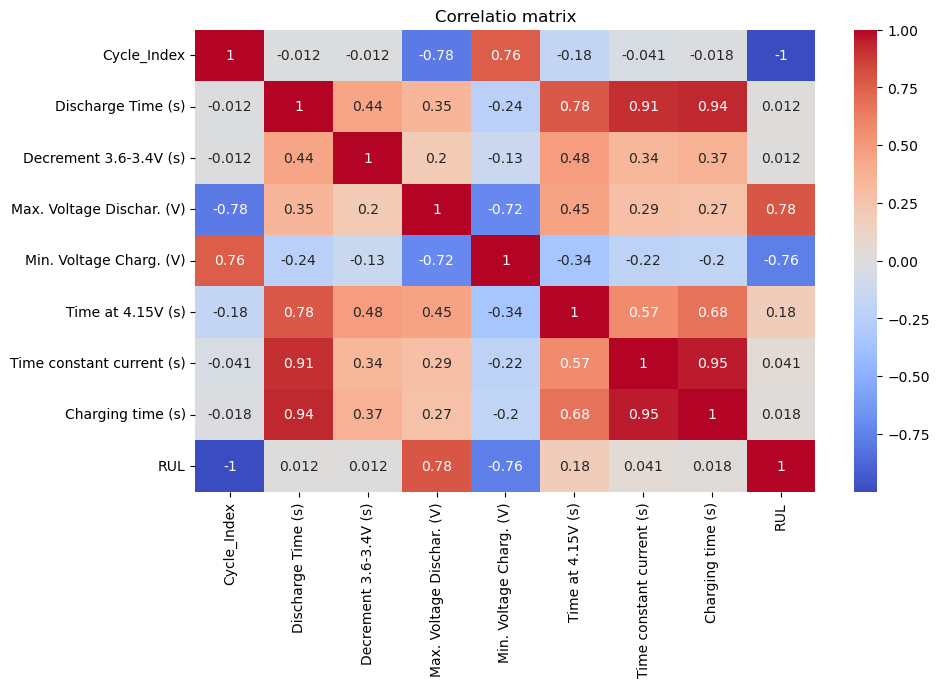

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)
plt.title('Correlatio matrix')
plt.show()

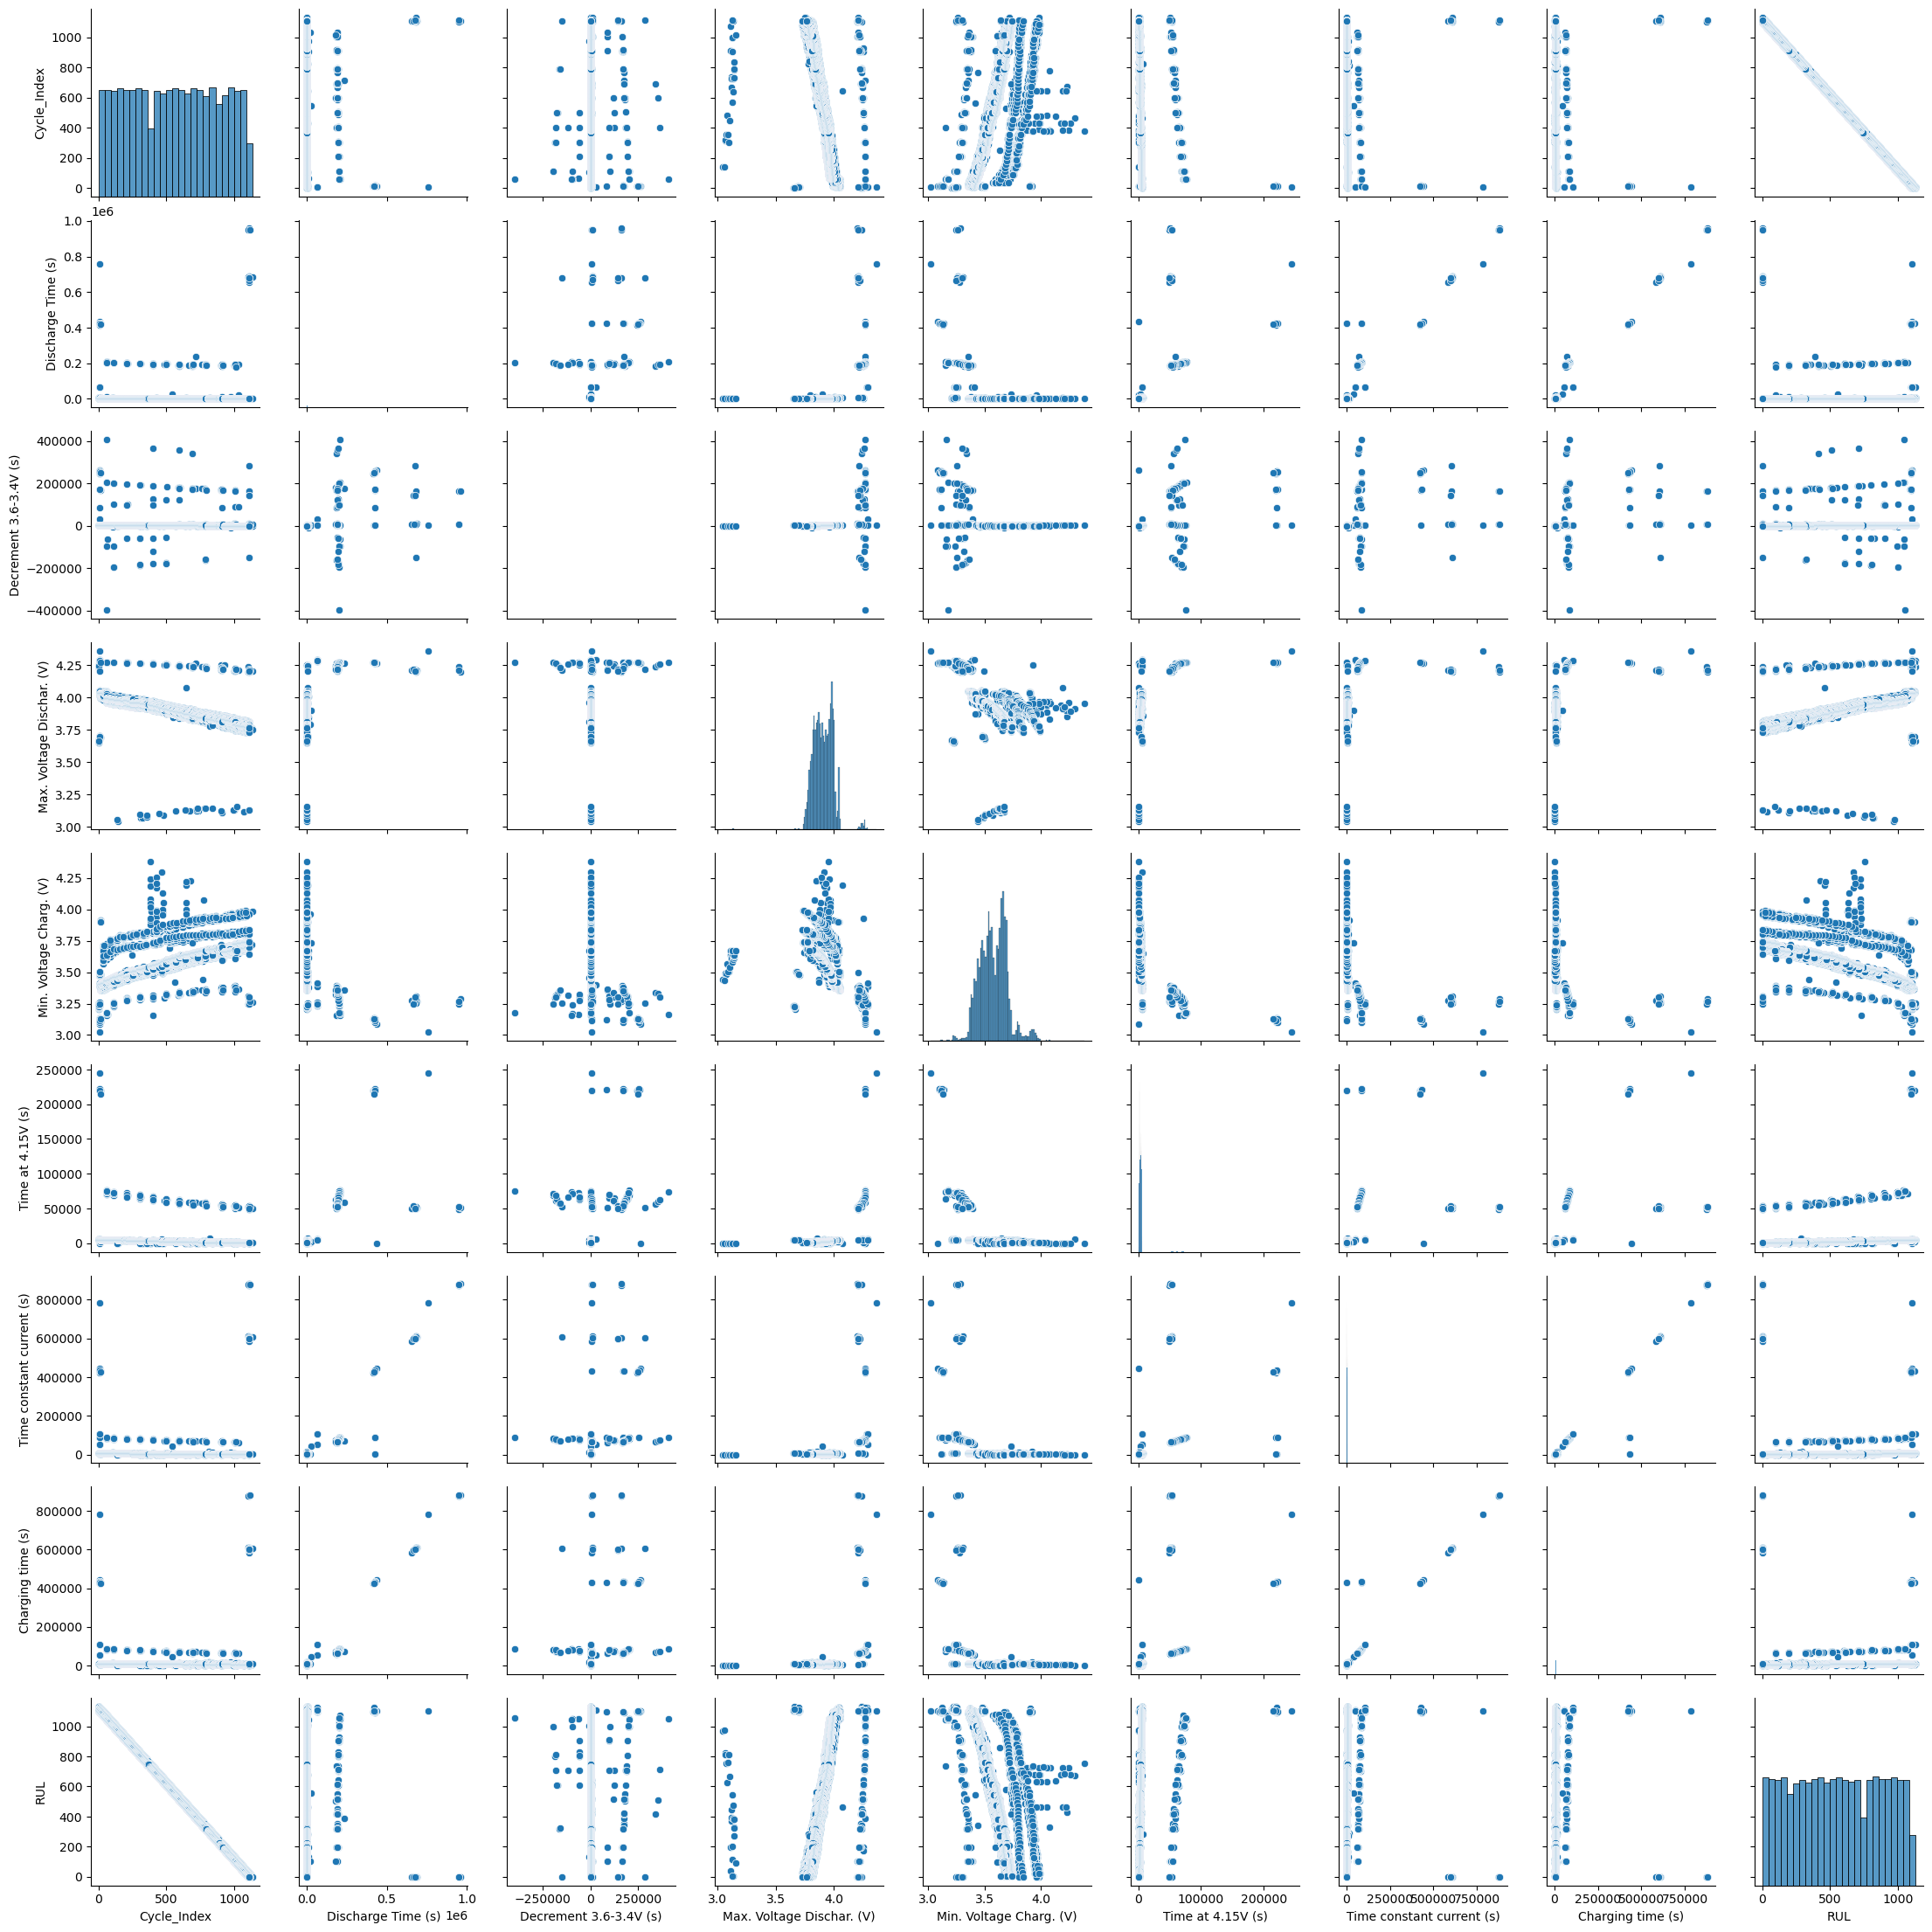

In [18]:
sns.pairplot(df,corner=False)
plt.show()

In [20]:
target=df['RUL']
features=df.drop(['RUL'],axis=1)

In [23]:
features=features.drop(['Cycle_Index'],axis=1)

In [24]:
features

Discharge Time (s)  Decrement 3.6-3.4V (s)  Max. Voltage Dischar. (V)  \
0                 2595.30             1151.488500                      3.670   
1                 7408.64             1172.512500                      4.246   
2                 7393.76             1112.992000                      4.249   
3                 7385.50             1080.320667                      4.250   
4                65022.75            29813.487000                      4.290   
...                   ...                     ...                        ...   
15059              770.44              179.523810                      3.773   
15060              771.12              179.523810                      3.773   
15061              769.12              179.357143                      3.773   
15062              773.88              162.374667                      3.763   
15063           677537.27           142740.640000                      4.206   

       Min. Voltage Charg. (V)  Time at 4.15V (s)  Time constant current (s)  \
0                        3.211           5460.001                    6755.01   
1                        3.220           5508.992                    6762.02   
2                        3.224           5508.993                    6762.02   
3                        3.225           5502.016                    6762.02   
4                        3.398           5480.992                   53213.54   
...                        ...                ...                        ...   
15059                    3.742            922.775                    1412.38   
15060                    3.744            915.512                    1412.31   
15061                    3.742            915.513                    1412.31   
15062                    3.839            539.375                    1148.00   
15063                    3.305          49680.004                  599830.14   

       Charging time (s)  
0               10777.82  
1               10500.35  
2               10420.38  
3               10322.81  
4               56699.65  
...                  ...  
15059            6678.88  
15060            6670.38  
15061            6637.12  
15062            7660.62  
15063          599830.14  

[15064 rows x 7 columns]

In [32]:
x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=43,test_size=0.3)

In [41]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=43)

In [42]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(random_state=43)

In [43]:
pred=rf_model.predict(x_test)

In [44]:
mean_squared_error(y_test,pred)

578.0772125730355

In [46]:
import joblib

In [47]:
joblib.dump(rf_model,'rul.pkl')

['rul.pkl']

In [49]:
features.columns

Index(['Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)'],
      dtype='object')